<a href="https://colab.research.google.com/github/sunand-kumar/new/blob/master/byke_sharing_polynomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

In [ ]:
data= pd.read_csv('C:/Users/Sunith/Documents/hour.csv')
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [ ]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
data.apply(lambda x: len(x.unique()))

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [ ]:
data = data.drop(data.columns[[0,1,3]], axis = 1)

In [ ]:
data.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
#categorical features
categorical_features = ['season','mnth','hr','holiday','weekday','working day','weathersit']

[Text(0.5, 1.0, 'count of bikes during weekdays and weekends')]

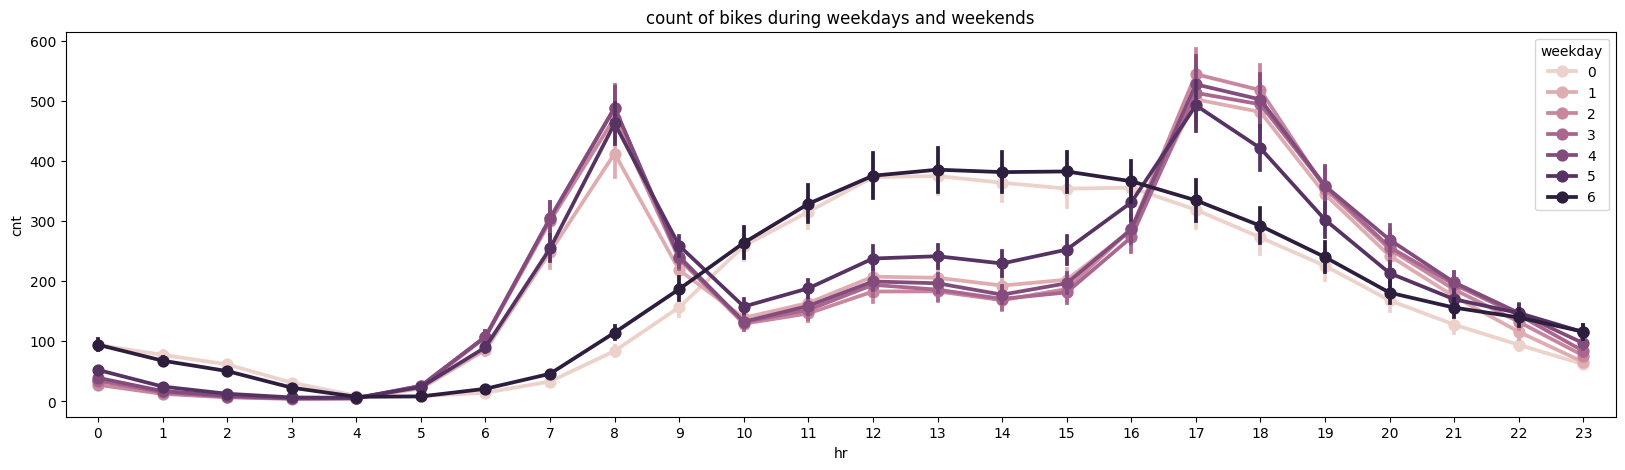

In [ ]:
#lets do some data analysis
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=data,x='hr',y='cnt',hue='weekday',ax=ax)
ax.set(title="count of bikes during weekdays and weekends")


[Text(0.5, 1.0, 'count of bikes during weekdays and weekends: unregistered users')]

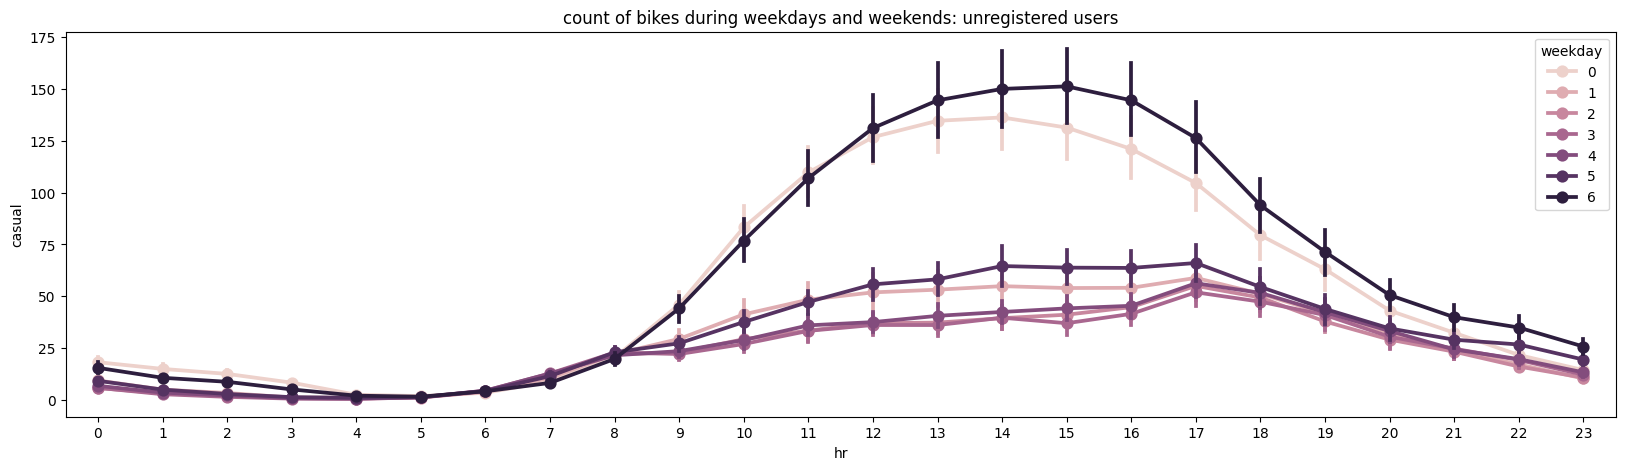

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=data,x='hr',y='casual',hue='weekday', ax=ax)
ax.set(title="count of bikes during weekdays and weekends: unregistered users")

[Text(0.5, 1.0, 'count of bikes during different weathers')]

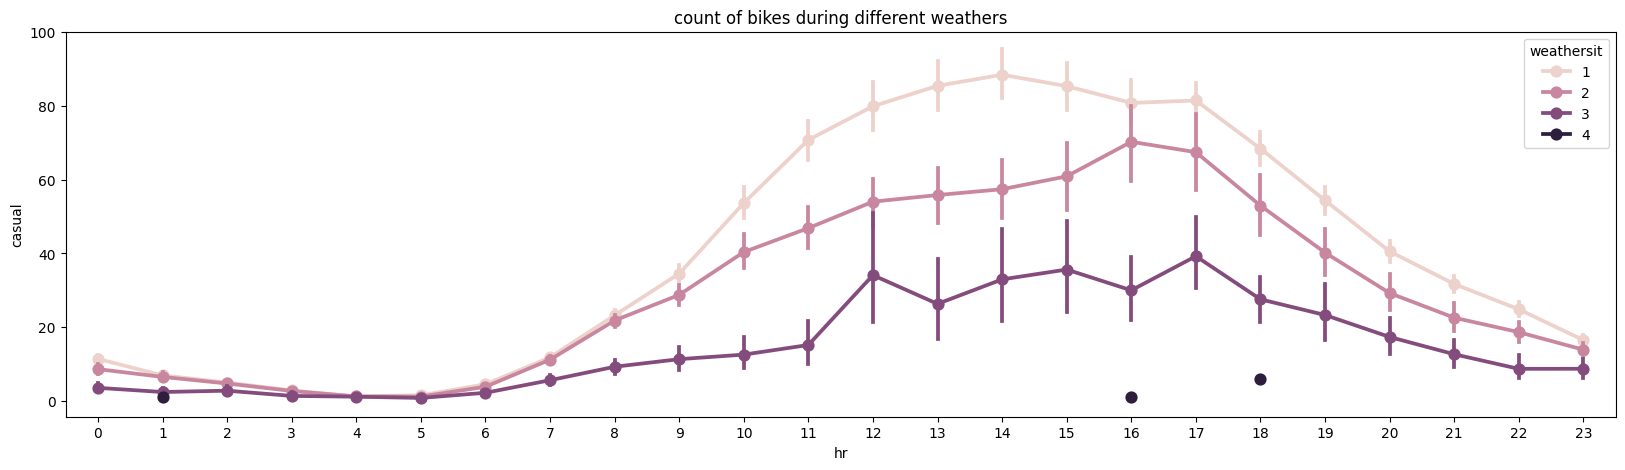

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=data,x='hr',y='casual',hue='weathersit', ax=ax)
ax.set(title="count of bikes during different weathers")

[Text(0.5, 1.0, 'count of bikes during diffent months')]

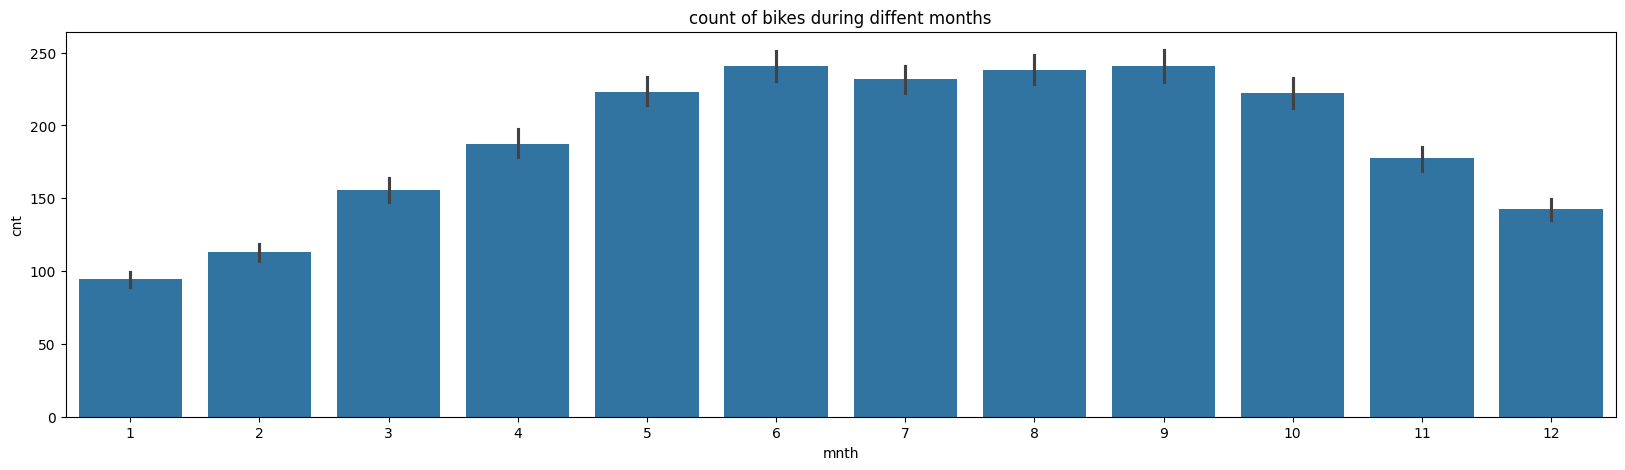

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=data,x='mnth',y='cnt',ax=ax)
ax.set(title="count of bikes during diffent months")

<Axes: >

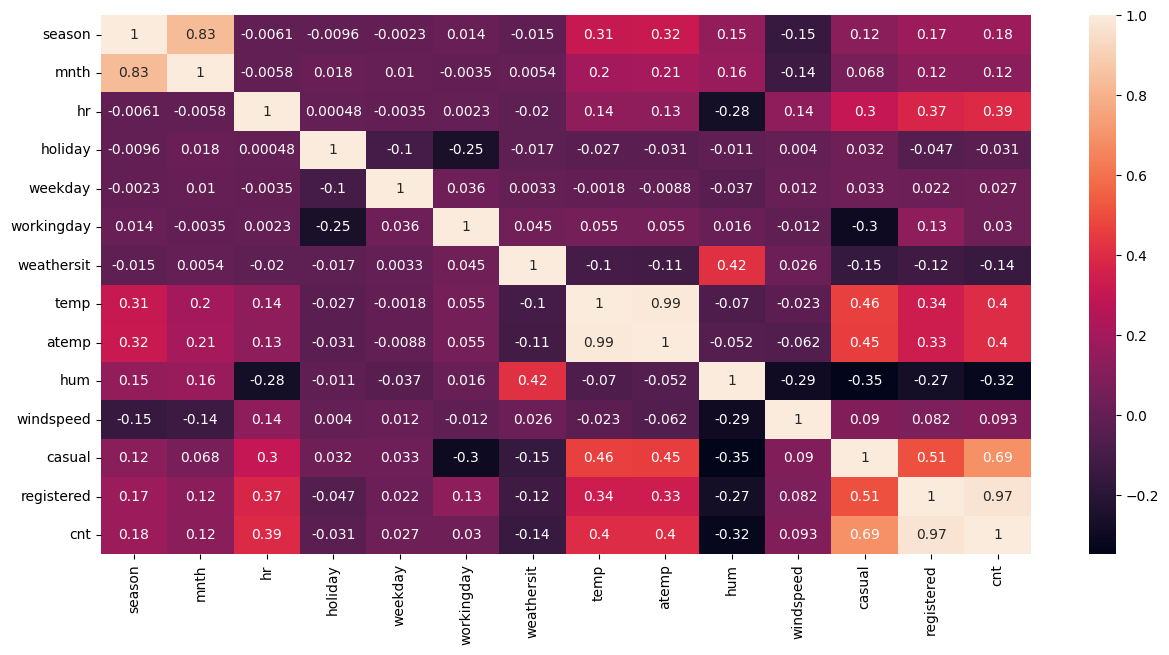

In [ ]:
corr = data.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr,annot=True,annot_kws={'size':10})

In [ ]:
categorical_cols = ['season','mnth','hr','holiday','weekday','workingday']
df = pd.get_dummies(data,columns=categorical_cols,drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 53 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weathersit    17379 non-null  int64  
 1   temp          17379 non-null  float64
 2   atemp         17379 non-null  float64
 3   hum           17379 non-null  float64
 4   windspeed     17379 non-null  float64
 5   casual        17379 non-null  int64  
 6   registered    17379 non-null  int64  
 7   cnt           17379 non-null  int64  
 8   season_2      17379 non-null  bool   
 9   season_3      17379 non-null  bool   
 10  season_4      17379 non-null  bool   
 11  mnth_2        17379 non-null  bool   
 12  mnth_3        17379 non-null  bool   
 13  mnth_4        17379 non-null  bool   
 14  mnth_5        17379 non-null  bool   
 15  mnth_6        17379 non-null  bool   
 16  mnth_7        17379 non-null  bool   
 17  mnth_8        17379 non-null  bool   
 18  mnth_9        17379 non-nu

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
imputer = scaler.fit(df.iloc[:,1:5])

In [ ]:
df.head()

,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,...,hr_22,hr_23,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1
0,1,0.24,0.2879,0.81,0.0,3,13,16,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,0.22,0.2727,0.80,0.0,8,32,40,False,False,...,False,False,False,False,False,False,False,False,True,False
2,1,0.22,0.2727,0.80,0.0,5,27,32,False,False,...,False,False,False,False,False,False,False,False,True,False
3,1,0.24,0.2879,0.75,0.0,3,10,13,False,False,...,False,False,False,False,False,False,False,False,True,False
4,1,0.24,0.2879,0.75,0.0,0,1,1,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
y_data = df['cnt'].values
data = df.drop(df.columns[[5,6,7]], axis=1)

In [ ]:
data.head()

,weathersit,temp,atemp,hum,windspeed,season_2,season_3,season_4,mnth_2,mnth_3,...,hr_22,hr_23,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1
0,1,0.24,0.2879,0.81,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,0.22,0.2727,0.80,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,1,0.22,0.2727,0.80,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,1,0.24,0.2879,0.75,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,1,0.24,0.2879,0.75,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
imputer = scaler.fit(df.iloc[:,1:5])
df.iloc[:,1:5] = imputer.transform(df.iloc[:,1:5])

In [ ]:
df.head()

,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,...,hr_22,hr_23,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1
0,1,0.224490,0.2879,0.81,0.0,3,13,16,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,0.204082,0.2727,0.80,0.0,8,32,40,False,False,...,False,False,False,False,False,False,False,False,True,False
2,1,0.204082,0.2727,0.80,0.0,5,27,32,False,False,...,False,False,False,False,False,False,False,False,True,False
3,1,0.224490,0.2879,0.75,0.0,3,10,13,False,False,...,False,False,False,False,False,False,False,False,True,False
4,1,0.224490,0.2879,0.75,0.0,0,1,1,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
y_data = df['cnt'].values
data = df.drop(df.columns[[5,6,7]], axis=1)

In [ ]:
df.head()

,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,...,hr_22,hr_23,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1
0,1,0.224490,0.2879,0.81,0.0,3,13,16,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,0.204082,0.2727,0.80,0.0,8,32,40,False,False,...,False,False,False,False,False,False,False,False,True,False
2,1,0.204082,0.2727,0.80,0.0,5,27,32,False,False,...,False,False,False,False,False,False,False,False,True,False
3,1,0.224490,0.2879,0.75,0.0,3,10,13,False,False,...,False,False,False,False,False,False,False,False,True,False
4,1,0.224490,0.2879,0.75,0.0,0,1,1,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(data, y_data,test_size=0.2,random_state=2)

In [ ]:
reg.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
prediction_test = reg.predict(x_test)

In [ ]:
M = len(prediction_test)
error = np.sum(np.power(prediction_test - y_test,2))*1/M

In [ ]:
error

12350.314360468457

In [ ]:
reg.coef_

array([ -21.06346479,  213.56392923,   88.58126851, -118.27737598,
        -46.98506371,   37.30559104,   25.09795116,   64.36639832,
         -1.38735166,    2.61759877,   -8.86008142,   -0.77218617,
        -24.42247052,  -43.65003633,  -17.79870388,   10.034154  ,
          1.77110036,  -16.52986102,   -9.99136557,  -15.76941189,
        -25.11992028,  -33.52625581,  -35.92684404,  -18.15792004,
         39.75303419,  174.6950567 ,  314.19468077,  163.72094301,
        105.44998658,  129.055797  ,  161.67492287,  157.35354935,
        140.04874581,  149.36880255,  209.89264417,  360.19828705,
        333.56793787,  225.59765848,  151.69714296,  102.61991799,
         68.4438429 ,   30.17707305,  -16.09478127,   -4.24990772,
         -1.74890282,   -0.5111428 ,   -2.9260684 ,    5.18006423,
         14.2592008 ,   11.83882376])

In [ ]:
prediction_train = reg.predict(x_train)

In [ ]:
training_score = r2_score(prediction_train,y_train)
testing_score = r2_score(prediction_test,y_test)
print(training_score,testing_score)

0.41109334965964983 0.3840292877711081


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2)
x_train_poly = poly_features.fit_transform(x_train)
poly_model =linear_model.LinearRegression()
poly_model.fit(x_train_poly,y_train)
x_test_poly = poly_features.fit_transform(x_test)

In [ ]:
prediction_test = poly_model.predict(x_test_poly)
prediction_train = poly_model.predict(x_train_poly)


In [ ]:
training_score = r2_score(prediction_train,y_train)
testing_score = r2_score(prediction_test,y_test)
print(training_score,testing_score)

0.8311501591390855 0.8061778225843264
